### Homework 2 - Question 3 - Luke Arend

In [1]:
import numpy as np
import scipy
from matplotlib import pyplot as plt
import seaborn as sns

obj = scipy.io.loadmat('mt2files/constrainedLS.mat')
D = obj['data']
w = np.squeeze(obj['w'])
D.shape, w

((300, 2), array([0.24, 0.54]))

### a)

Given vectors $\{\vec d_{n}\}$ and $\vec w$, we want to minimize $\sum_{n} (\vec\beta^T \vec d_{n})^2$ subject to the constraint $\vec\beta^T \vec w = 1$. 

In [2]:
U, s, Vt = np.linalg.svd(D)

Assume the data matrix $D$ has the singular value decomposition $USV^T$. Then we have the matrix problem:

Find $\vec\beta$ that minimizes $\lVert USV^T \vec\beta \rVert^2$ such that $\vec\beta^T \vec w = 1$.

We apply a change of variables to $\vec\beta$ to eliminate $V^T$. In particular we define a new variable $\vec\beta^*$ which is $\vec\beta$ rotated by $V^T$. The new constraint vector becomes $\vec w^* = V^T \vec w$. Then our problem is:

Find $\vec\beta^*$ that minimizes $\lVert US\vec\beta^* \rVert^2$ such that ${\vec\beta^*}^T \vec w^* = 1$.

To eliminate $S$ we scale $\vec\beta^*$ by $S$. This gives us a new variable $\tilde\beta = S \vec\beta^*$ and new constraint vector $\tilde{w} = S^{-1} \vec{w}^*$. Now our problem is:

Find $\tilde\beta$ that minimizes $\lVert U\tilde\beta \rVert^2$ such that ${\tilde\beta}^T \tilde{w} = 1$.

### b)

$U$ rotates $\tilde\beta$ by an orthonormal matrix, leaving its magnitude unchanged. So the quantity to be minimized is just $\lVert \tilde\beta \rVert^2$.

The shortest $\tilde\beta$ which satisfies ${\tilde\beta}^T \tilde{w} = 1$ must point in the same direction as $\tilde{w}$ and have length $\frac{1}{\lVert \tilde{w} \rVert}$, so that its dot product with $\tilde{w}$ is 1. Therefore

$\tilde\beta = \frac{\tilde{w}}{\lVert \tilde{w} \rVert^2}$.

And we can write $\tilde{w}$ in terms of the initial constraint $\vec{w}$:

$\tilde{w} = S^{-1} \vec{w}^* = S^{-1} V^T \vec{w}$.

In [3]:
w1 = np.diag(1 / s) @ Vt @ w
b1 = w1 / (w1 @ w1)
w1, b1

(array([-0.0234546 , -0.05898736]), array([ -5.82054025, -14.63841709]))

We plot the solution vector, constraint line and transformed data points below.

The constraint line has the equation $\tilde\beta^T \vec w = 1$ or $\tilde\beta_0 w_0 + \tilde\beta_1 w_1 = 1$. So it is the line where $(\beta_0, \beta_1)$ satisfies $\beta_1 = \frac{1}{w_1} - \frac{w_0}{w_1}\beta_0$.

The transformed data points come from $D$ applying the variable changes to $D^T$ and transposing back.

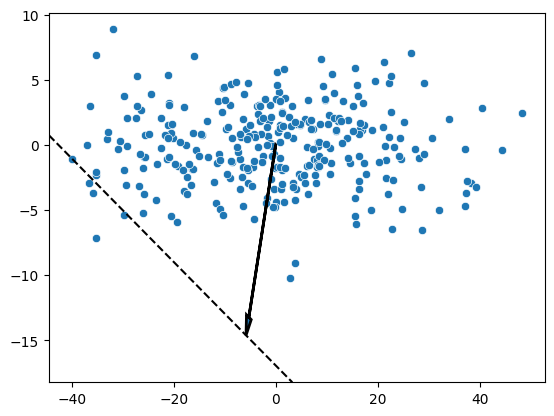

In [4]:
D1 = (np.diag(s) @ Vt @ D.T).T
y0 = 1 / w1[1]
m = -w1[0]/w1[1]
sns.scatterplot(x=D1[:, 0], y=D1[:, 1])
plt.axline((0, y0), slope=m, color="black", linestyle='--')
plt.arrow(0, 0, b1[0], b1[1], head_width=1, linewidth=2,
          length_includes_head=True)
plt.show()

### c)

To transform the solution back to the original space, shrink $\tilde\beta$ by $S$ and rotate by $V$:

$\vec\beta = V S^\# \tilde\beta$

In [5]:
b = Vt.T @ np.diag(1 / s) @ b1
b

array([-0.3782429 ,  2.01995981])

This $\vec\beta$ solves the initial constraint.

In [6]:
b @ w

1.0

We can plot the $\vec\beta$, the original constraint line, and the original data.

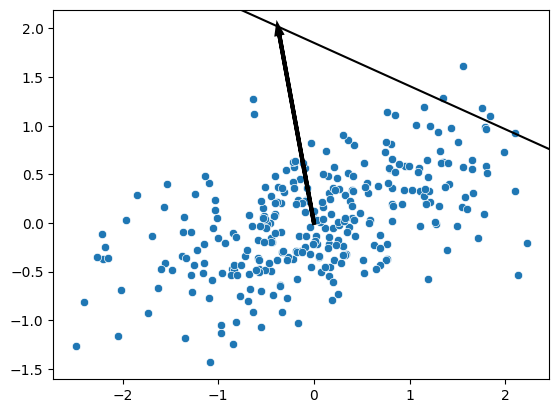

In [7]:
sns.scatterplot(x=D[:, 0], y=D[:, 1])
plt.axline((0, 1 / w[1]), slope=-w[0]/w[1], color="black")
plt.arrow(0, 0, b[0], b[1], head_width=0.05, linewidth=3, color='k',
          length_includes_head=True)
plt.show()

The optimal vector $\vec\beta$ is not perpendicular to the constraint line. If $\vec\beta$ were perpendicular to (and lying on) the constraint line it would satisfy the constraint, but would then have greater dot products with the points in $D$, no longer minimizing $\sum_{n} (\vec\beta^T \vec d_{n})^2$.

What is the total least squares solution (i.e. the vector that minimizes the $\lVert D\hat\beta \rVert^2$ where $\hat\beta$ is a unit vector)? Geometrically, $\hat\beta$ should point in the direction of the _minimum_ spread of the data points in $D$. This will be the second principle component of $D$, or the second eigenvector of $D^T D$.

In [8]:
C = D.T @ D
U, s, Vt = np.linalg.svd(C)
b_hat = Vt.T[:, 1]

Now we plot again showing the least squares solution vector in red. The solutions are not the same.

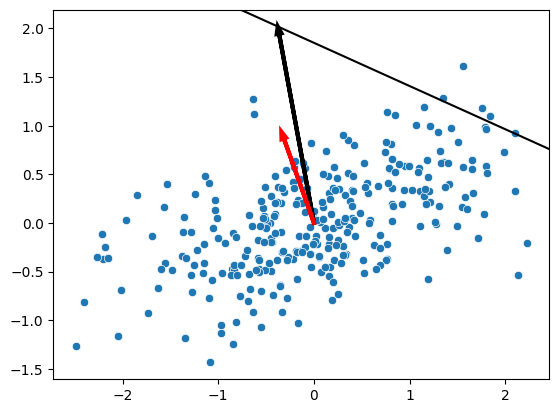

In [9]:
sns.scatterplot(x=D[:, 0], y=D[:, 1])
plt.axline((0, 1 / w[1]), slope=-w[0]/w[1], color="black")
plt.arrow(0, 0, b[0], b[1], head_width=0.05, linewidth=3, color='k',
          length_includes_head=True)
plt.arrow(0, 0, b_hat[0], b_hat[1], head_width=0.05, linewidth=3, color='r',
          length_includes_head=True)
plt.show()